 ## This is a pyspark example notebook along with sql
- Supported magics can be found via %%help
- %%markdown: markdown or Select "Markdown" from Cell type dropdown
- %%sql: sql on spark
- %%bash or %%sh: shell
- %%local: Execution in kernel
- %%configure: Can be used to configure Spark settings

### Run spark command
- SparkContext is available as sc
- Spark application is started lazily on the first Spark command run

In [1]:
sc.version

Kernel Id: 4d155291-d9c0-4978-a540-f99a1da9eb98
Starting Spark application


<IPython.core.display.HTML object>

SparkSession available as 'spark'.


u'2.4.0'

### pyspark Pi Calculation example

In [2]:
from random import random
from operator import add
partitions = 10
n = 100000 * partitions

def f(_):
    x = random() * 2 - 1
    y = random() * 2 - 1
    return 1 if x ** 2 + y ** 2 < 1 else 0

count = sc.parallelize(xrange(1, n + 1), partitions).map(f).reduce(add)
print "Pi is roughly %f" % (4.0 * count / n)

Pi is roughly 3.140512

### sql example

In [3]:
%%sql
show tables

In [4]:
# Alternate way to use spark sql
sqlContext.sql("show tables").collect()

[Row(database=u'default', tableName=u'default_qubole_airline_origin_destination', isTemporary=False), Row(database=u'default', tableName=u'default_qubole_memetracker', isTemporary=False), Row(database=u'default', tableName=u'salesdata', isTemporary=False)]

In [5]:
%%sql
select * from default_qubole_memetracker limit 10

Output()

### Visualizations on airline data for four quarters

In [6]:
%%sql
select origin, quarter, count(*)/1000000 count from default_qubole_airline_origin_destination
  where quarter is not NULL group by origin, quarter order by count desc limit 100


Output()

### Matplotlib example using store and local magic
- Using -o with sql stores the data in the specified variable in the kernel

In [7]:
%%sql -o data -q
select * from default_qubole_airline_origin_destination limit 10

### Matplotlib can be used alongwith %%local to plot stored data

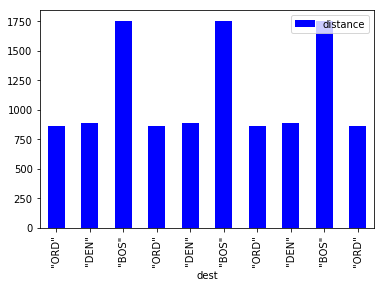

In [8]:
%%local
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data['distance'] = pd.to_numeric(data['distance'], errors='coerce')
data.plot(kind='bar', x='dest', y='distance', color='blue')

plt.show()

### Matplotlib example using matplot line magic

In [9]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import pandas as pd

plt.figure(num=None, figsize=(10, 10), dpi=100)

df = pd.read_csv("https://raw.githubusercontent.com/arangodb/example-datasets/master/Cities/GeoLiteCity.csv")

col1 = df['longitude']
col2 = df['latitude']
plt.scatter(col1, col2, edgecolors='r')

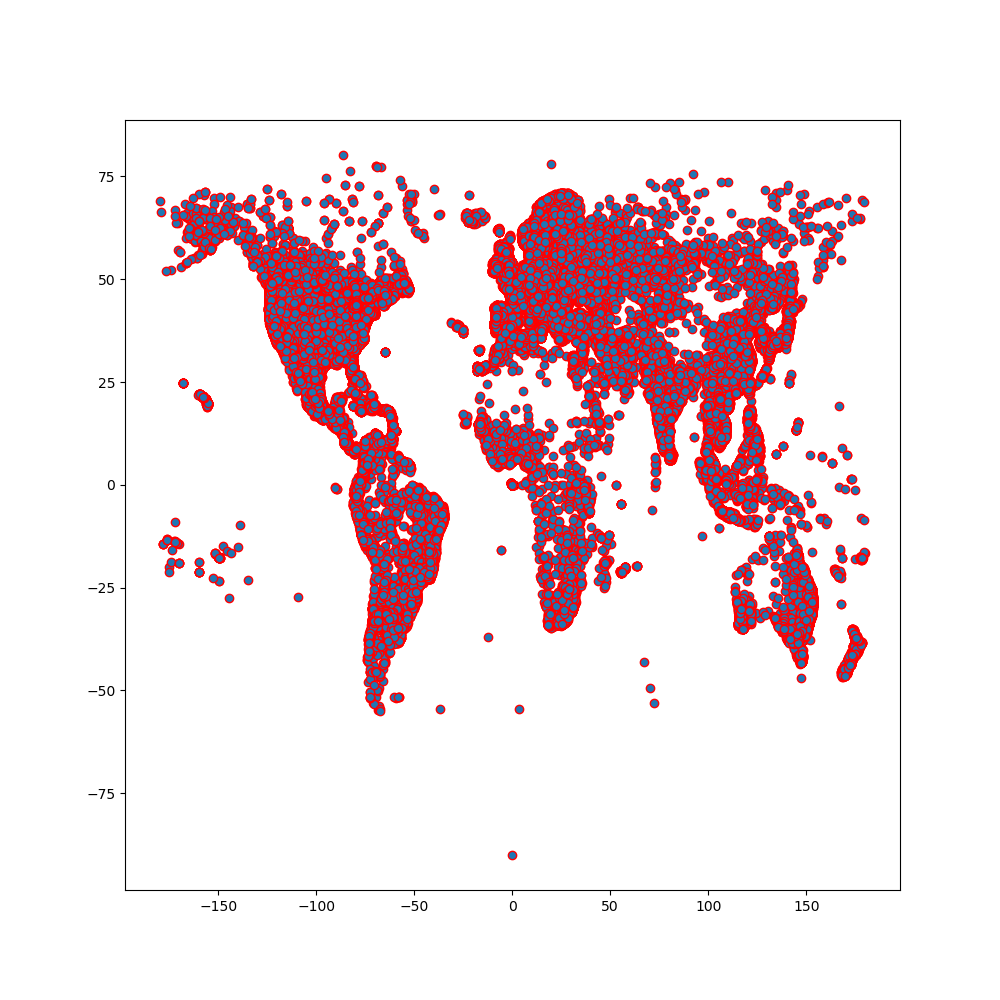

In [10]:
%matplot plt